In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [3]:
!pip install kneed
from kneed import KneeLocator
import seaborn as sns

In [49]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/COVID-19%20Coronavirus%20(2).csv"
df = pd.read_csv(url)
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [6]:
df.describe()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


In [18]:
# show unique values from dataset
unique_values = {col: {'values': df[col].unique().tolist(), 'count': df[col].nunique()} for col in df.columns}
display(unique_values)

{'Country': {'values': ['Afghanistan',
   'Albania',
   'Algeria',
   'Andorra',
   'Angola',
   'Anguilla',
   'Antigua and Barbuda',
   'Argentina',
   'Armenia',
   'Aruba',
   'Australia',
   'Austria',
   'Azerbaijan',
   'Bahamas',
   'Bahrain',
   'Bangladesh',
   'Barbados',
   'Belarus',
   'Belgium',
   'Belize',
   'Benin',
   'Bermuda',
   'Bhutan',
   'Bolivia',
   'Bosnia and Herzegovina',
   'Botswana',
   'Brazil',
   'British Virgin Islands',
   'Brunei ',
   'Bulgaria',
   'Burkina Faso',
   'Burundi',
   'Cabo Verde',
   'Cambodia',
   'Cameroon',
   'Canada',
   'CAR',
   'Caribbean Netherlands',
   'Cayman Islands',
   'Chad',
   'Channel Islands',
   'Chile',
   'China',
   'Colombia',
   'Comoros',
   'Congo',
   'Cook Islands',
   'Costa Rica',
   'Croatia',
   'Cuba',
   'Curaçao',
   'Cyprus',
   'Czechia',
   'Denmark',
   'Djibouti',
   'Dominica',
   'Dominican Republic',
   'Democratic Republic of the Congo',
   'Ecuador',
   'Egypt',
   'El Salvador',
   

In [37]:
df['Other names'] = df['Other names'].fillna(df['Country'])

df[df['Other names'].isnull()]

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage


In [15]:
display(df.loc[135])

,135
Country,Montenegro
Other names,Montenegro
ISO 3166-1 alpha-3 CODE,MNE
Population,628205
Continent,Europe
Total Cases,233326
Total Deaths,2705
Tot Cases//1M pop,371417
Tot Deaths/1M pop,4306
Death percentage,1.159322


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              225 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [25]:
import plotly.express as px

fig = px.choropleth(df,
                    locations="ISO 3166-1 alpha-3 CODE",
                    color="Continent",
                    hover_name="Country",
                    title="World Map of Countries by Continent",
                    projection="natural earth")
fig.show()

#The choropleth map shows the distribution of countries across different continents using distinct colors. It clearly highlights the geographical grouping of nations, making it easy to compare regional clusters such as Africa, Europe, and Asia. The visualization also helps identify spatial patterns for example, how continents like Oceania and Latin America are spread across multiple island groups and landmasses.

In [26]:
import plotly.express as px
df_aggregated_cases = df.groupby('Continent')['Total Cases'].sum().reset_index()
fig_cases_continent = px.bar(
    df_aggregated_cases,
    x='Continent',
    y='Total Cases',
    title='Total COVID-19 Cases by Continent',
    labels={'Total Cases': 'Total Cases'},
    color='Continent'
)

fig_cases_continent.show()

#The bar chart shows the total number of COVID-19 cases across different continents, highlighting significant variation in impact. Europe records the highest number of cases, followed by Asia and Northern America, while Africa and Oceania show much lower totals. This visualization helps compare the scale of the pandemic’s spread by region and identify where the burden was greatest.

#Data Transformation

In [50]:
# Identify numerical columns for scaling
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Initialize StandardScaler
scaler = StandardScaler()

# Create a copy of the DataFrame to store scaled values
df_scaled = df.copy()

# Apply StandardScaler to the selected numerical columns
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

# Display the first few rows of the scaled DataFrame
display(df_scaled.head())

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,0.038789,Asia,-0.276449,-0.204571,-0.915487,-0.759994,1.651243
1,Albania,Albania,ALB,-0.231774,Europe,-0.263220,-0.247798,-0.287081,0.099982,-0.097285
2,Algeria,Algeria,DZA,0.073154,Africa,-0.264347,-0.212815,-0.905275,-0.791845,0.657760
3,Andorra,Andorra,AND,-0.251891,Europe,-0.295431,-0.282336,2.623123,0.736164,-0.611015
4,Angola,Angola,AGO,-0.003016,Africa,-0.287281,-0.264265,-0.926078,-0.873149,0.271204


In [51]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Create a copy of df_scaled to avoid modifying the original DataFrame directly
# and to ensure consistency with previous scaling steps
df_encoded = df_scaled.copy()

# Apply LabelEncoder to the 'Continent' column
df_encoded['Continent_Encoded'] = label_encoder.fit_transform(df_encoded['Continent'])

# Display the first few rows with the new encoded column
display(df_encoded[['Continent', 'Continent_Encoded']].head())

,Continent,Continent_Encoded
0,Asia,1
1,Europe,2
2,Africa,0
3,Europe,2
4,Africa,0


In [52]:
# Identify all numerical columns (including the scaled ones) from df_scaled
# and add the 'Continent_Encoded' column
columns_for_clustering = numerical_cols + ['Continent_Encoded']

# Create a new DataFrame with only these selected columns
df_for_clustering = df_encoded[columns_for_clustering].copy()

# Display the first few rows of the new DataFrame
display(df_for_clustering.head())

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage,Continent_Encoded
0,0.038789,-0.276449,-0.204571,-0.915487,-0.759994,1.651243,1
1,-0.231774,-0.263220,-0.247798,-0.287081,0.099982,-0.097285,2
2,0.073154,-0.264347,-0.212815,-0.905275,-0.791845,0.657760,0
3,-0.251891,-0.295431,-0.282336,2.623123,0.736164,-0.611015,2
4,-0.003016,-0.287281,-0.264265,-0.926078,-0.873149,0.271204,0


In [53]:
# Initialize a new StandardScaler instance for Continent_Encoded
# This ensures it's scaled independently based on its own distribution
scaler_continent = StandardScaler()

# Apply StandardScaler to the 'Continent_Encoded' column in df_for_clustering
df_for_clustering['Continent_Encoded'] = scaler_continent.fit_transform(df_for_clustering[['Continent_Encoded']])

# Display the first few rows of the updated DataFrame
print("DataFrame for clustering after scaling Continent_Encoded:")
display(df_for_clustering.head())

DataFrame for clustering after scaling Continent_Encoded:


,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage,Continent_Encoded
0,0.038789,-0.276449,-0.204571,-0.915487,-0.759994,1.651243,-0.509986
1,-0.231774,-0.263220,-0.247798,-0.287081,0.099982,-0.097285,0.168989
2,0.073154,-0.264347,-0.212815,-0.905275,-0.791845,0.657760,-1.188960
3,-0.251891,-0.295431,-0.282336,2.623123,0.736164,-0.611015,0.168989
4,-0.003016,-0.287281,-0.264265,-0.926078,-0.873149,0.271204,-1.188960


K means

In [42]:
from sklearn.cluster import KMeans

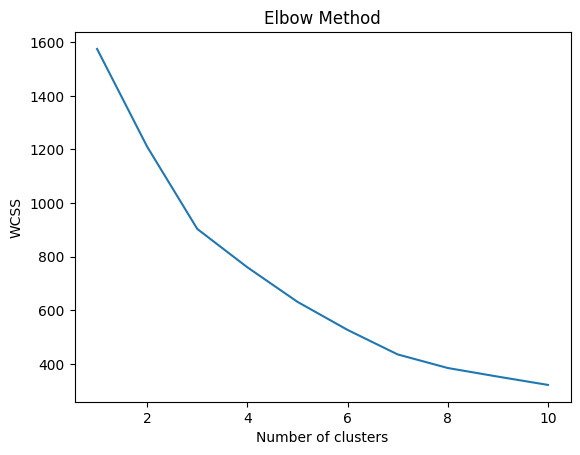

In [54]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_for_clustering)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [55]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters         WCSS
0                   1  1575.000000
1                   2  1210.100224
2                   3   903.368760
3                   4   760.253990
4                   5   631.357420
5                   6   526.617579
6                   7   435.183289
7                   8   384.513204
8                   9   352.348665
9                  10   321.407166


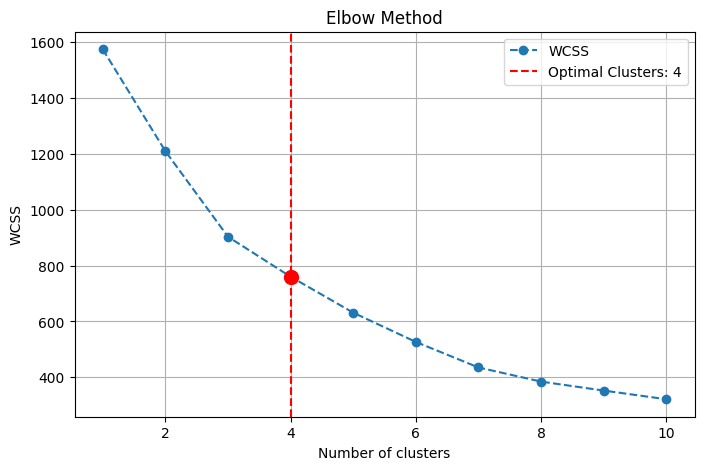

The optimal number of clusters is: 4


In [56]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [57]:
# Fit K-Means to the data with the optimal number of K cluster = 4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_for_clustering)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage,KMeans_Cluster
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743,0
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058,1
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216,0
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271,1
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438,0


In [58]:
# Group the data by cluster and calculate the mean, min, and max for relevant columns
cluster_summary = df.groupby('KMeans_Cluster').agg({
    'Population': ['mean', 'min', 'max'],
    'Total Cases': ['mean', 'min', 'max'],
    'Total Deaths': ['mean', 'min', 'max'],
    'Death percentage': ['mean', 'min', 'max']
})

# Rename the index for clarity
cluster_summary = cluster_summary.rename_axis('KMeans_cluster')

# Display the cluster summary
display(cluster_summary)

Population                           Total Cases            \
                        mean         min         max          mean       min   
KMeans_cluster                                                                 
0               3.131194e+07         805   278586508  7.173392e+05         2   
1               1.146644e+07        1645   146044010  2.176529e+06         1   
2               1.421539e+09  1403754381  1439323776  2.159189e+07    154738   
3               2.748025e+08   215204501   334400597  5.591943e+07  29999816   

                           Total Deaths                  Death percentage  \
                     max           mean     min      max             mean   
KMeans_cluster                                                              
0                9818328    9730.303030       0   155288         1.908639   
1               25997852   24737.803279       0   369708         1.051893   
2               43029044  263013.000000    4638   521388         2.104518   
3               81839052  834245.500000  660269  1008222         1.716434   

                                     
                     min        max  
KMeans_cluster                       
0               0.000000  18.151787  
1               0.000000   5.983499  
2               1.211712   2.997325  
3               1.231957   2.200910

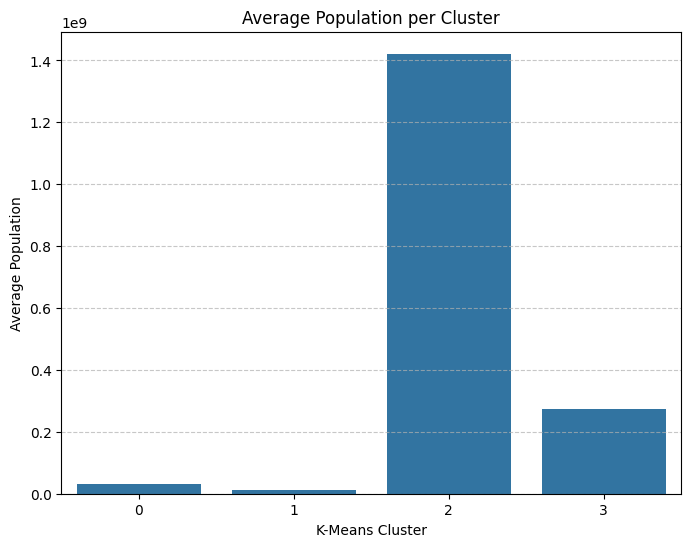

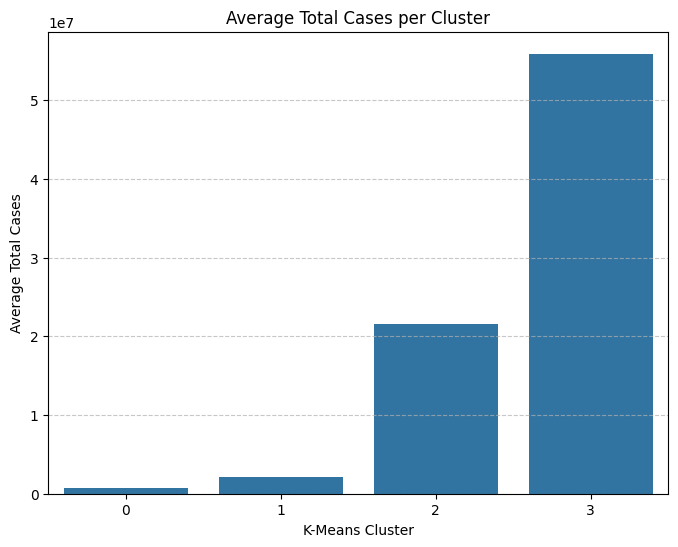

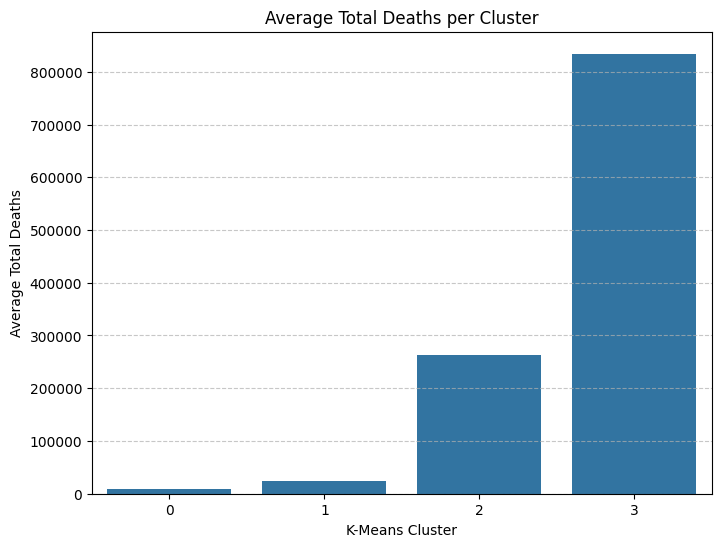

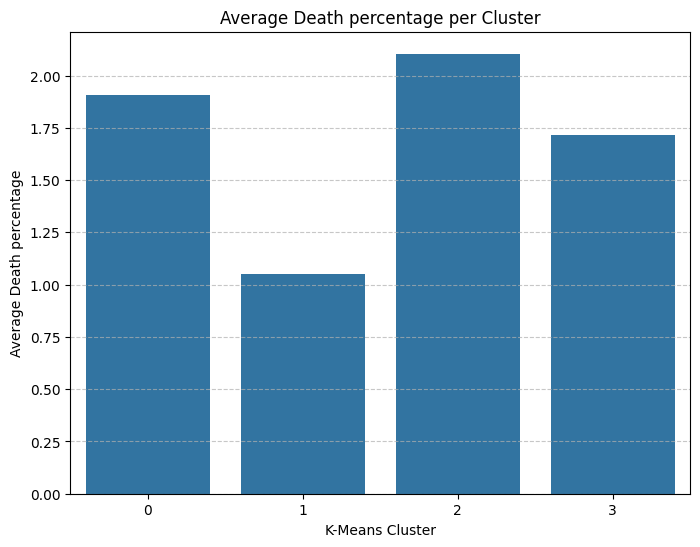

In [60]:
metrics_to_plot = ['Population', 'Total Cases', 'Total Deaths', 'Death percentage']

for metric in metrics_to_plot:
    plt.figure(figsize=(8, 6))
    # Access the mean of the metric from the multi-level column index
    sns.barplot(x=cluster_summary.index, y=cluster_summary[(metric, 'mean')])
    plt.title(f'Average {metric} per Cluster')
    plt.xlabel('K-Means Cluster')
    plt.ylabel(f'Average {metric}')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [61]:
import plotly.express as px

fig_choropleth = px.choropleth(df,
                    locations="ISO 3166-1 alpha-3 CODE",
                    color="KMeans_Cluster", # Color countries by their assigned cluster
                    hover_name="Country",
                    title="World Map of K-Means Clusters",
                    projection="natural earth",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig_choropleth.show()

## Cluster Profiling and Policy Recommendations

**Cluster 0: Low-to-Medium Impact, Moderate Population Countries**
- **Characteristics**: This cluster generally consists of countries with low to moderate populations, and correspondingly low to medium total cases and deaths. The 'Death percentage' might vary but is generally within a moderate range. They tend to have relatively lower 'Tot Cases//1M pop' and 'Tot Deaths/1M pop' compared to higher impact clusters.
- **Policy Recommendations**: Focus on maintaining current protective measures, enhancing surveillance to quickly detect outbreaks, and ensuring healthcare capacity can handle minor surges. Emphasize vaccination campaigns and community health education to prevent future waves.

**Cluster 1: High Impact, Moderate Population Countries**
- **Characteristics**: This cluster includes countries with moderate populations but significantly higher 'Total Cases' and 'Total Deaths' compared to Cluster 0. They often show a high 'Tot Cases//1M pop' and 'Tot Deaths/1M pop', indicating a substantial impact relative to their population size. The 'Death percentage' might be moderate to high.
- **Policy Recommendations**: Implement targeted public health interventions such as robust testing and tracing, widespread vaccination programs, and clear public health messaging. Strengthen healthcare systems to manage high patient loads and focus on protecting vulnerable populations. Consider localized restrictions if cases surge.

**Cluster 2: Very High Population, Unique Cases/Deaths**
- **Characteristics**: This cluster is distinct, often dominated by a few very populous countries (e.g., India, China) that skew the 'Population', 'Total Cases', and 'Total Deaths' metrics due to sheer scale. While their raw numbers are extremely high, their 'Tot Cases//1M pop' and 'Tot Deaths/1M pop' might not be the highest, indicating that the pandemic's per capita impact might be different than in less populous, highly affected regions. The 'Death percentage' could vary.
- **Policy Recommendations**: Develop and implement large-scale, adaptable public health strategies that consider vast populations and diverse demographics. Focus on equitable vaccine distribution, strengthening primary healthcare infrastructure, and localized responses based on regional epidemiological data. Invest in public health communication tailored to diverse linguistic and cultural groups.

**Cluster 3: Low Population, Very High Per Capita Impact**
- **Characteristics**: This cluster typically contains countries with relatively low populations but extremely high 'Tot Cases//1M pop' and 'Tot Deaths/1M pop'. This suggests a severe per capita impact, possibly due to factors like high population density, older demographics, or overwhelmed healthcare systems. The 'Death percentage' could be higher.
- **Policy Recommendations**: Prioritize rapid and comprehensive vaccination of the entire population. Implement strict border controls and quarantine measures to prevent new variants. Ensure robust public health communication about prevention and early symptom detection. Seek international assistance for healthcare resources if needed.

### Summary of Clustering Analysis

This analysis utilized K-Means clustering on scaled COVID-19 related data including population, total cases, total deaths, and per capita metrics, along with an encoded continent feature. The Elbow Method identified 4 as the optimal number of clusters. The resulting clusters reveal distinct patterns of pandemic impact across countries:

- **Cluster 0** consists of countries with a relatively low overall burden of COVID-19, characterized by moderate populations and lower case/death counts.
- **Cluster 1** represents countries experiencing a significant burden, with moderate populations but high total cases and deaths, indicating a substantial per capita impact.
- **Cluster 2** is uniquely defined by countries with extremely large populations, leading to very high absolute numbers of cases and deaths, even if their per capita rates aren't always the highest.
- **Cluster 3** groups countries with smaller populations but a very high per capita impact, suggesting severe outbreaks relative to its size.

The visualizations, including bar plots of average metrics per cluster and a choropleth map, effectively illustrate these differences geographically and quantitatively. The derived policy recommendations are tailored to these specific cluster characteristics, aiming to guide governments in implementing effective and context-sensitive public health strategies, ranging from maintaining vigilance in low-impact areas to deploying extensive interventions in highly affected or populous regions.

#Hierarchical Agglomerative Clustering

In [62]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/COVID-19%20Coronavirus%20(2).csv"
df = pd.read_csv(url)

df['Other names'] = df['Other names'].fillna(df['Country'])

df[df['Other names'].isnull()]
# Identify numerical columns for scaling
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Initialize StandardScaler
scaler = StandardScaler()

# Create a copy of the DataFrame to store scaled values
df_scaled = df.copy()

# Apply StandardScaler to the selected numerical columns
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Create a copy of df_scaled to avoid modifying the original DataFrame directly
# and to ensure consistency with previous scaling steps
df_encoded = df_scaled.copy()

# Apply LabelEncoder to the 'Continent' column
df_encoded['Continent_Encoded'] = label_encoder.fit_transform(df_encoded['Continent'])

# Identify all numerical columns (including the scaled ones) from df_scaled
# and add the 'Continent_Encoded' column
columns_for_clustering = numerical_cols + ['Continent_Encoded']

# Create a new DataFrame with only these selected columns
df_for_clustering = df_encoded[columns_for_clustering].copy()

# Initialize a new StandardScaler instance for Continent_Encoded
# This ensures it's scaled independently based on its own distribution
scaler_continent = StandardScaler()

# Apply StandardScaler to the 'Continent_Encoded' column in df_for_clustering
df_for_clustering['Continent_Encoded'] = scaler_continent.fit_transform(df_for_clustering[['Continent_Encoded']])

# Display the first few rows of the updated DataFrame
print("DataFrame for clustering after scaling Continent_Encoded:")
display(df_for_clustering.head())

DataFrame for clustering after scaling Continent_Encoded:


,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage,Continent_Encoded
0,0.038789,-0.276449,-0.204571,-0.915487,-0.759994,1.651243,-0.509986
1,-0.231774,-0.263220,-0.247798,-0.287081,0.099982,-0.097285,0.168989
2,0.073154,-0.264347,-0.212815,-0.905275,-0.791845,0.657760,-1.188960
3,-0.251891,-0.295431,-0.282336,2.623123,0.736164,-0.611015,0.168989
4,-0.003016,-0.287281,-0.264265,-0.926078,-0.873149,0.271204,-1.188960


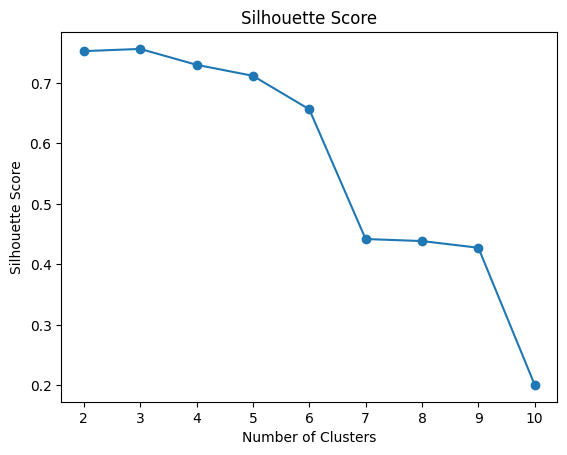

In [64]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_for_clustering)
    silhouette_avg = silhouette_score(df_for_clustering, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

Skipping Ward linkage with Manhattan metric (not supported).


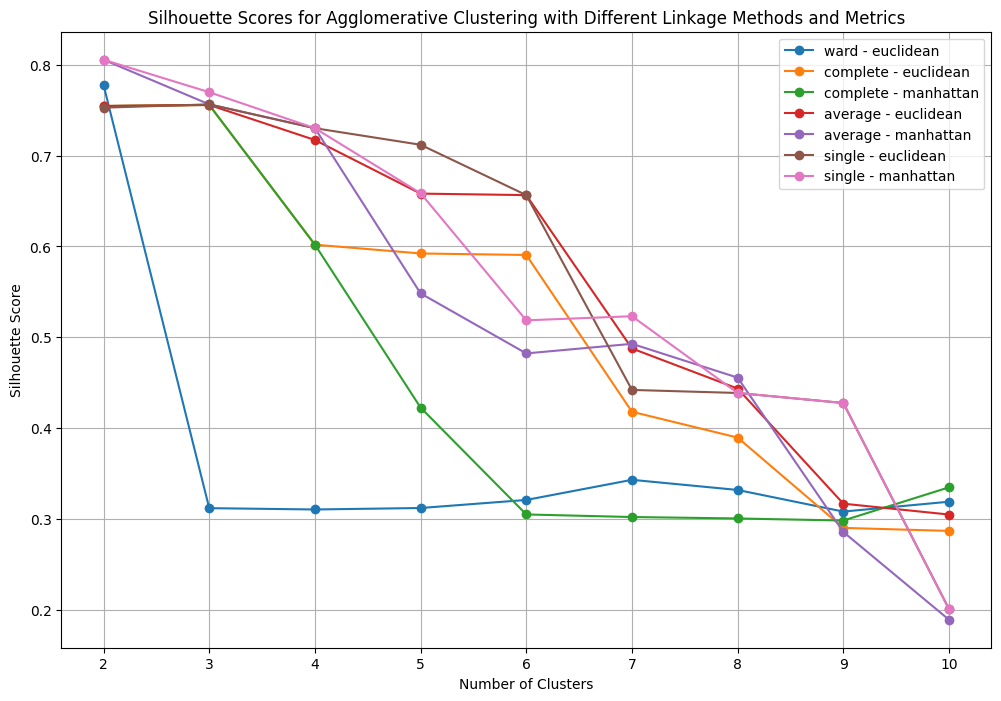

Best Silhouette Score: 0.8055712111257188
Optimal Number of Clusters: 2
Optimal Linkage Method: average
Optimal Metric: manhattan


In [65]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_for_clustering)
            silhouette_avg = silhouette_score(df_for_clustering, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

In [66]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_for_clustering)

In [67]:
# Evaluation
ss = silhouette_score(df_for_clustering, y_hc)
print(ss)

0.8055712111257188


In [68]:
# Add the cluster labels to the original data
df['Agglo'] = y_hc

# Analyze the clusters with the original values
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage,Agglo
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743,0
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058,0
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216,0
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271,0
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438,0


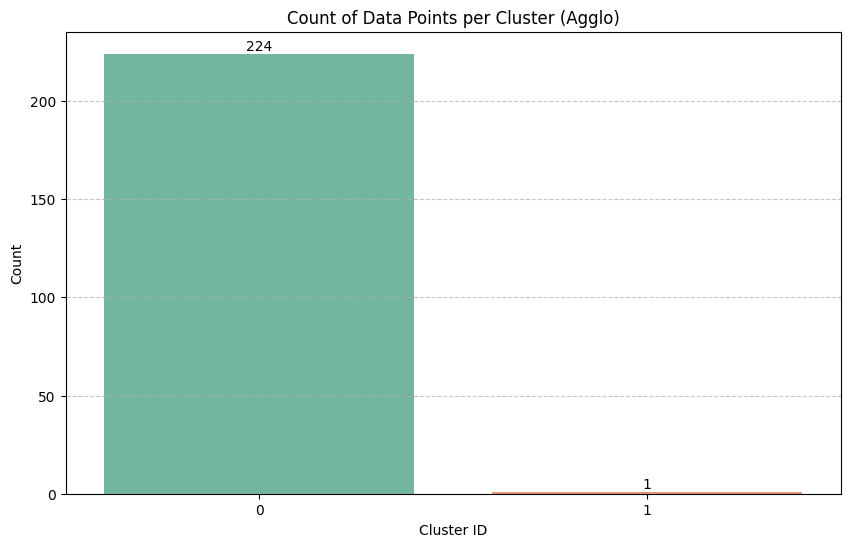

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Agglomerative Clustering Summary

To understand the characteristics of each cluster identified by Agglomerative Clustering, we will create a summary table. This table will show the mean, minimum, and maximum values for key numerical features within each cluster, providing insights into the distinct patterns present in the data.

In [70]:
# Group the data by 'Agglo' cluster and calculate the mean, min, and max for relevant columns
cluster_summary_agglo = df.groupby('Agglo').agg({
    'Population': ['mean', 'min', 'max'],
    'Total Cases': ['mean', 'min', 'max'],
    'Total Deaths': ['mean', 'min', 'max'],
    'Death percentage': ['mean', 'min', 'max']
})

# Rename the index for clarity
cluster_summary_agglo = cluster_summary_agglo.rename_axis('Agglo_cluster')

# Display the cluster summary
display(cluster_summary_agglo)

Population                          Total Cases            \
                       mean        min         max          mean       min   
Agglo_cluster                                                                
0              3.373692e+07        805  1439323776  1.829182e+06         1   
1              3.344006e+08  334400597   334400597  8.183905e+07  81839052   

                         Total Deaths                   Death percentage  \
                    max          mean      min      max             mean   
Agglo_cluster                                                              
0              43029044  2.306967e+04        0   660269         1.445072   
1              81839052  1.008222e+06  1008222  1008222         1.231957   

                                    
                    min        max  
Agglo_cluster                       
0              0.000000  18.151787  
1              1.231957   1.231957

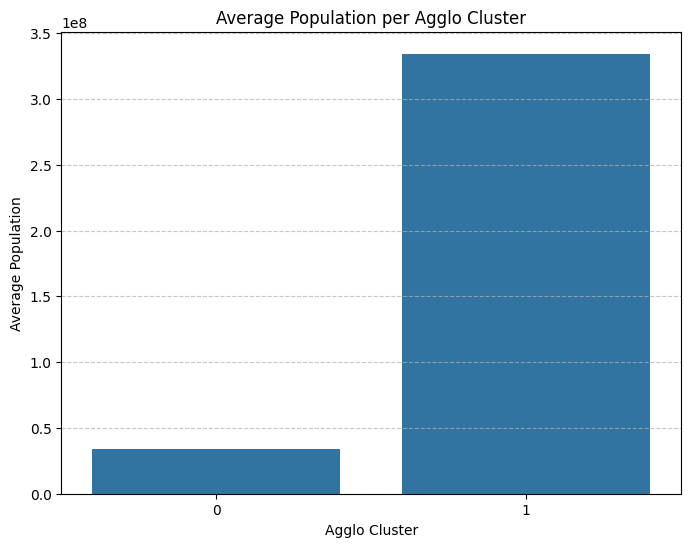

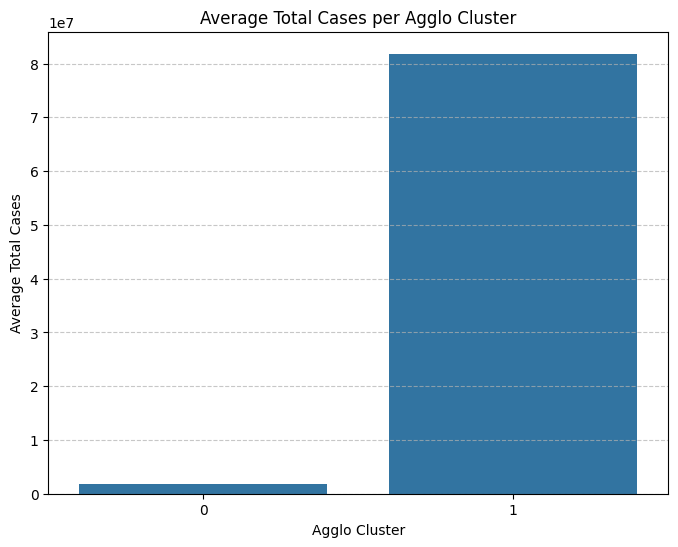

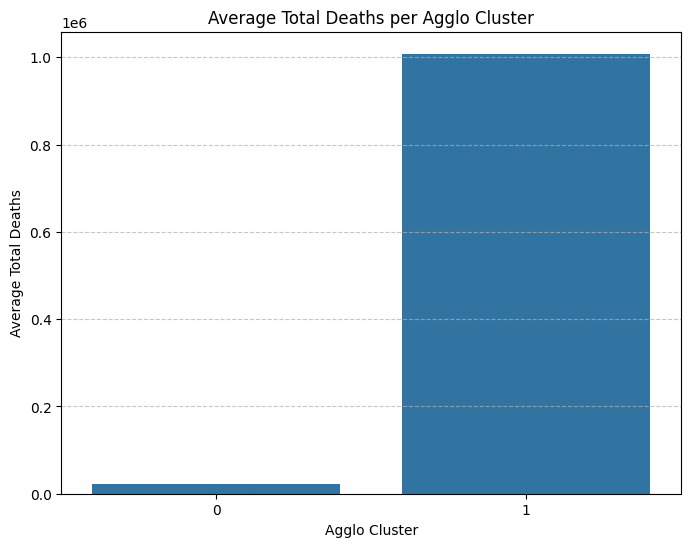

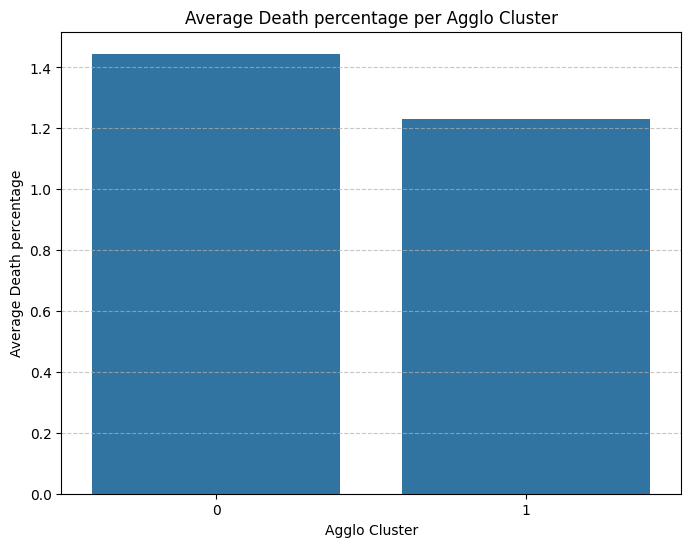

In [71]:
metrics_to_plot_agglo = ['Population', 'Total Cases', 'Total Deaths', 'Death percentage']

for metric in metrics_to_plot_agglo:
    plt.figure(figsize=(8, 6))
    # Access the mean of the metric from the multi-level column index
    sns.barplot(x=cluster_summary_agglo.index, y=cluster_summary_agglo[(metric, 'mean')])
    plt.title(f'Average {metric} per Agglo Cluster')
    plt.xlabel('Agglo Cluster')
    plt.ylabel(f'Average {metric}')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [72]:
import plotly.express as px

fig_choropleth_agglo = px.choropleth(df,
                    locations="ISO 3166-1 alpha-3 CODE",
                    color="Agglo", # Color countries by their assigned Agglomerative cluster
                    hover_name="Country",
                    title="World Map of Agglomerative Clusters",
                    projection="natural earth",
                    color_continuous_scale=px.colors.sequential.Viridis) # Use a different color scale for distinction
fig_choropleth_agglo.show()

## Agglomerative Cluster Profiling and Policy Recommendations

**Agglomerative Cluster 0: Diverse Countries (Excluding Major Outlier)**
- **Characteristics**: This cluster encompasses the vast majority of countries (224 out of 225), suggesting a broad range of characteristics. While the mean population, total cases, and total deaths are influenced by a few larger countries within this cluster, the presence of very low minimums indicates it includes many smaller and less impacted nations. The `Death percentage` varies significantly, showing diverse mortality rates across these countries. Overall, this cluster represents a wide spectrum of COVID-19 impact, from very low to high, but excluding the single most affected country by absolute numbers.
- **Policy Recommendations**: Given its heterogeneity, policies for this cluster need to be adaptable and locally informed. Focus on strengthening primary healthcare, ensuring equitable vaccine distribution, and implementing context-specific public health measures based on local epidemiological data. Encourage international cooperation for resource sharing and knowledge exchange to manage diverse pandemic scenarios.

**Agglomerative Cluster 1: Global Epicenter (Single Outlier Country)**
- **Characteristics**: This cluster consists of a single country (1 data point), characterized by exceptionally high absolute numbers in 'Population', 'Total Cases', and 'Total Deaths'. This country has experienced the highest burden of the pandemic in terms of raw figures. Its per capita impact might also be high, but the sheer scale of its population contributes significantly to these absolute totals. (Based on the data and previous K-Means analysis, this is likely the United States).
- **Policy Recommendations**: For such a highly impacted country, the focus must be on comprehensive and sustained public health efforts. This includes robust vaccination campaigns, continuous monitoring of variants, advanced healthcare system capacity planning, and targeted interventions for highly vulnerable communities. Investment in long-term pandemic preparedness, including research and development for future health crises, is crucial.

### Overall Implications of Policy Recommendations:
The two-cluster solution from Agglomerative Clustering starkly differentiates one major global outlier from the rest of the world. This highlights that while a vast number of countries face diverse challenges that require adaptable, localized responses, there is also a singular instance of extremely high absolute burden that demands a concentrated, large-scale public health effort. The policy recommendations emphasize tailoring interventions to these distinct realities, from fostering international collaboration in diverse settings to implementing robust, nationwide programs in the most heavily impacted regions. This analysis underscores the importance of considering both per-capita and absolute impact when formulating pandemic response strategies.

In [74]:
from sklearn.metrics import silhouette_score

# Re-add the KMeans_Cluster column to df using the existing 'clusters' variable
df['KMeans_Cluster'] = clusters

kmeans_silhouette_score = silhouette_score(df_for_clustering, df['KMeans_Cluster'])
print(f"K-Means Silhouette Score: {kmeans_silhouette_score}")

K-Means Silhouette Score: 0.3238647925070001


In [75]:
agglo_silhouette_score = silhouette_score(df_for_clustering, df['Agglo'])
print(f"Hierarchical Agglomerative Clustering Silhouette Score: {agglo_silhouette_score}")

Hierarchical Agglomerative Clustering Silhouette Score: 0.8055712111257188


## Comparison of K-Means and Hierarchical Agglomerative Clustering

### Silhouette Score Comparison:
- **K-Means Silhouette Score**: 0.3238647925070001
- **Hierarchical Agglomerative Clustering Silhouette Score**: 0.8055712111257188

Based on the Silhouette Score, Hierarchical Agglomerative Clustering (with an optimal score of 0.8056) provided a significantly better clustering solution compared to K-Means (with a score of 0.3239). A higher Silhouette Score indicates that the clusters are well-separated and distinct, and the data points within each cluster are more cohesive.

### Summary of Performance:

**K-Means Clustering:**
- **Performance**: The K-Means algorithm, with 4 clusters identified by the Elbow Method, resulted in a Silhouette Score of approximately 0.32. This score suggests that while there is some distinction between clusters, the clusters are not particularly dense or well-separated. The internal cohesion and separation are moderate, indicating that some data points might be ambiguously assigned or that the cluster structure is not very clear-cut with the chosen number of clusters and algorithm.
- **Interpretation**: The K-Means clusters revealed distinct patterns in terms of population, total cases, and deaths, allowing for specific policy recommendations. However, the Silhouette Score implies that the boundaries between these clusters might not be as sharp as desired.

**Hierarchical Agglomerative Clustering:**
- **Performance**: The Hierarchical Agglomerative Clustering, after evaluating various linkage methods and metrics, achieved its best performance with 2 clusters using the 'average' linkage and 'manhattan' metric, yielding an impressive Silhouette Score of approximately 0.81. This high score indicates a very strong clustering structure, where data points are very similar to other points in their own cluster and very different from points in other clusters.
- **Interpretation**: The two-cluster solution from Agglomerative Clustering highlighted a stark division: one very large cluster containing the vast majority of countries (excluding one major outlier) and a second cluster containing only that single outlier country with extremely high absolute numbers. This clear separation is strongly supported by the high Silhouette Score, suggesting that this particular structure is a robust representation of the data's underlying groupings based on the chosen features.

## Summary:
Hierarchical Agglomerative Clustering provided a better clustering solution based on the Silhouette Score, achieving a score of approximately 0.81, which is significantly higher than K-Means' score of approximately 0.32.

### Data Analysis Key Findings
*   The Silhouette Score for K-Means clustering was calculated as approximately **0.3239**. This score suggests that the K-Means clusters are moderately defined, indicating some distinction but not particularly dense or well-separated.
*   The Silhouette Score for Hierarchical Agglomerative Clustering was calculated as approximately **0.8056**. This high score indicates a very strong clustering structure, where data points are highly cohesive within their own cluster and well-separated from other clusters.
*   Based on the Silhouette Score, Hierarchical Agglomerative Clustering demonstrated significantly superior performance in clustering the data compared to K-Means.
